## EENG 439: Neural Networks and Learning Systems Final Project

### Corn Future Predictions using Convolutional Neural Networks

In [4]:
# Install Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime, timedelta
import pickle

In [5]:
## Load in the data
corn_files = ['USDAProj_Corn_2017to2018.csv',
'USDAProj_Corn_2016to2017.csv',
'USDAProj_Corn_2015to2016.csv',
'USDAProj_Corn_2009to2010.csv',
'USDAProj_Corn_2014to2015.csv',
'USDAProj_Corn_2013to2014.csv',
'USDAProj_Corn_2012to2013.csv',
'USDAProj_Corn_2011to2012.csv',
'USDAProj_Corn_2010to2011.csv',
'USDAProj_Corn_2008to2009.csv',
'USDAProj_Corn_2007to2008.csv']

soybeans_files = ['USDAProj_Soybean_2017to2018.csv',
'USDAProj_Soybean_2016to2017.csv',
'USDAProj_Soybean_2015to2016.csv',
'USDAProj_Soybean_2009to2010.csv',
'USDAProj_Soybean_2014to2015.csv',
'USDAProj_Soybean_2013to2014.csv',
'USDAProj_Soybean_2012to2013.csv',
'USDAProj_Soybean_2011to2012.csv',
'USDAProj_Soybean_2010to2011.csv',
'USDAProj_Soybean_2008to2009.csv',
'USDAProj_Soybean_2007to2008.csv']

corn_files.sort()
soybeans_files.sort()

monthly_corn_data = pd.read_csv('Data/USDAProj_Corn_2007to2008.csv')
for file in corn_files[1:]:
    file_path = str('Data/' + file)
    monthly_corn_data = monthly_corn_data.append(pd.read_csv(file_path))
monthly_corn_data.sort_values(by="Date")
    
corn_prices = pd.read_csv('Data/Corn_prices.csv')
corn_prices_new = pd.read_csv('Data/corn_prices_edited.csv')

monthly_soybean_data = pd.read_csv('Data/USDAProj_Soybean_2007to2008.csv')
for file in soybeans_files[1:]:
    file_path = str('Data/' + file)
    monthly_soybean_data = monthly_soybean_data.append(pd.read_csv(file_path))
    
monthly_soybean_data.sort_values(by="Date")
    
soybean_prices = pd.read_csv('Data/Soybean_prices.csv')

weather = pd.read_csv('Data/weather_data_iowa.csv')

In [6]:
weather

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,WDMV,WSF2,WSF5
0,USW00014933,41.53380,-93.65300,291.7,2004-01-01,0.00,52.0,27.0,NaN,21.0,23.0
1,USW00014933,41.53380,-93.65300,291.7,2004-01-02,0.00,60.0,31.0,NaN,21.0,25.9
2,USW00014933,41.53380,-93.65300,291.7,2004-01-03,0.00,34.0,20.0,NaN,19.9,21.9
3,USW00014933,41.53380,-93.65300,291.7,2004-01-04,0.30,21.0,11.0,NaN,21.9,29.1
4,USW00014933,41.53380,-93.65300,291.7,2004-01-05,0.00,11.0,-5.0,NaN,23.9,29.1
...,...,...,...,...,...,...,...,...,...,...,...
23353,USW00094988,42.11056,-92.91611,296.9,2019-12-27,0.00,40.0,21.0,NaN,18.1,23.0
23354,USW00094988,42.11056,-92.91611,296.9,2019-12-28,0.84,49.0,31.0,NaN,21.9,27.1
23355,USW00094988,42.11056,-92.91611,296.9,2019-12-29,0.01,52.0,30.0,NaN,23.9,35.1
23356,USW00094988,42.11056,-92.91611,296.9,2019-12-30,0.00,30.0,22.0,NaN,28.0,40.0


In [7]:
print(monthly_corn_data.shape)
print(monthly_soybean_data.shape)

print(corn_prices.shape)
print(soybean_prices.shape)

(248, 113)
(248, 70)
(1035, 8)
(942, 8)


In [8]:
monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,90.5,82.9,150.3,937.0,12460.0,15.0,13412.0,5700.0,4790.0,...,21.35,0.24,1.95,10.42,55.37,3.5,45.3,60.3,0.3,8.69
1,2007/06/11,90.5,82.9,150.3,987.0,12460.0,15.0,13462.0,5700.0,4790.0,...,21.35,0.24,1.95,10.72,55.72,3.5,45.8,60.8,0.3,8.84
2,2007/07/12,92.9,85.4,150.3,1137.0,12840.0,15.0,13992.0,5700.0,4790.0,...,21.35,0.24,1.97,10.72,55.23,3.5,45.8,60.8,0.3,8.35
3,2007/08/10,92.9,85.4,152.8,1137.0,13054.0,15.0,14206.0,5750.0,4790.0,...,21.35,0.24,1.92,10.72,48.43,6.0,45.8,60.8,0.3,4.05
4,2007/09/12,92.9,85.4,155.8,1142.0,13308.0,15.0,14465.0,5850.0,4690.0,...,21.35,0.24,1.77,10.62,46.94,8.0,46.5,61.5,0.3,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2017/11/09,90.4,83.1,175.4,2295.0,14578.0,50.0,16922.0,5575.0,6935.0,...,43.70,0.72,2.67,7.09,59.59,16.0,56.0,74.7,1.5,6.47
7,2017/12/12,90.4,83.1,175.4,2295.0,14578.0,50.0,16922.0,5575.0,6985.0,...,43.70,0.72,2.77,7.55,60.09,16.0,56.0,74.8,2.0,6.84
8,2018/01/12,90.2,82.7,176.6,2293.0,14604.0,50.0,16947.0,5550.0,6995.0,...,43.70,0.82,2.75,7.54,60.09,16.0,56.0,74.8,2.0,6.83
9,2018/02/08,90.2,82.7,176.6,2293.0,14604.0,50.0,16947.0,5550.0,6995.0,...,43.80,0.82,2.73,7.54,60.09,16.2,56.2,75.0,2.0,6.83


In [9]:
len(monthly_corn_data[monthly_corn_data.isna().any(axis=1)]) == 0
len(monthly_soybean_data[monthly_soybean_data.isna().any(axis=1)]) == 0
len(corn_prices[corn_prices.isna().any(axis=1)]) == 0
len(soybean_prices[soybean_prices.isna().any(axis=1)]) == 0

True

In [10]:
normalized_monthly_corn_data=(monthly_corn_data.iloc[:,1:]-monthly_corn_data.iloc[:,1:].mean())/monthly_corn_data.iloc[:,1:].std()
#normalized_monthly_corn_data.drop_duplicates().reset_index(drop=True)
normalized_monthly_corn_data.insert(0, 'Date', monthly_corn_data['Date'])#.drop_duplicates().reset_index(drop=True))
normalized_monthly_corn_data = normalized_monthly_corn_data.sort_values(by='Date').reset_index(drop=True)

In [11]:
to_delete = []

for i in range(1,len(normalized_monthly_corn_data)):
    if normalized_monthly_corn_data['Date'][i] == normalized_monthly_corn_data['Date'][i-1]:
        to_delete.append(i)

In [12]:
normalized_monthly_corn_data = normalized_monthly_corn_data.drop(to_delete).reset_index(drop=True)

In [13]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007/06/11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007/07/12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007/08/10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007/09/12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017/11/09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017/12/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018/01/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018/02/08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [14]:
fields = list(normalized_monthly_corn_data.keys())

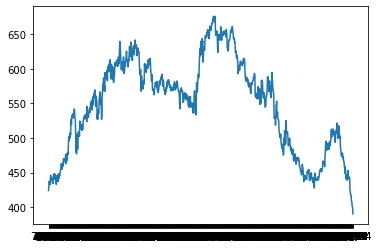

In [15]:
plt.plot(corn_prices['dates'], corn_prices['Close'])

In [16]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007/05/11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007/06/11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007/07/12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007/08/10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007/09/12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017/11/09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017/12/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018/01/12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018/02/08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [17]:
corn_prices['dates'] = pd.to_datetime(corn_prices['dates'])
normalized_monthly_corn_data['Date'] = pd.to_datetime(normalized_monthly_corn_data['Date'])

In [18]:
normalized_monthly_corn_data

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007-05-11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007-06-11,-0.166298,-0.194336,-0.558742,-1.126988,-0.625089,-0.650767,-0.909783,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.611096,-0.698195,-1.122585,-1.134327,-1.052182,-1.712385,2.173196
2,2007-07-12,0.501137,0.586030,-0.558742,-0.736071,-0.291844,-0.650767,-0.496527,1.170855,-1.762278,...,-1.708698,-1.128923,-1.237508,2.611096,-0.774917,-1.122585,-1.134327,-1.052182,-1.712385,1.823231
3,2007-08-10,0.501137,0.586030,-0.373193,-0.736071,-0.104174,-0.650767,-0.329665,1.290236,-1.762278,...,-1.708698,-1.128923,-1.298658,2.611096,-1.839631,-0.590660,-1.134327,-1.052182,-1.712385,-1.247886
4,2007-09-12,0.501137,0.586030,-0.150534,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,...,-1.708698,-1.128923,-1.482110,2.550054,-2.072929,-0.165120,-0.993941,-0.947355,-1.712385,-1.455008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017-11-09,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.071112,0.151080,0.144182,1.281716,0.690688,0.849689,0.263372,0.923322
126,2017-12-12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.604991,1.113630,...,1.506934,1.720321,0.193413,0.169393,0.198984,1.377463,0.710743,0.879640,0.460948,1.251861
127,2018-01-12,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.614541,1.110892,...,1.506934,1.720321,0.242333,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
128,2018-02-08,-0.249728,-0.256766,1.393234,2.276602,1.255115,0.402890,1.807572,0.812713,1.255988,...,1.672611,0.475506,-0.308021,0.669942,-0.013959,1.579594,0.951405,1.074319,0.263372,0.737627


In [19]:
price_years = []
for i in range(len(corn_prices['dates'])):
    price_years.append(corn_prices['dates'][i].year)
    
price_years = np.unique(price_years)

In [20]:
data_years = []
for i in range(len(normalized_monthly_corn_data['Date'])):
    data_years.append(normalized_monthly_corn_data['Date'][i].year)
    
data_years = np.unique(data_years)

In [158]:
data_years

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [21]:
to_add = []
for i in range(len(normalized_monthly_corn_data)-1):
    if (normalized_monthly_corn_data['Date'][i+1] - normalized_monthly_corn_data['Date'][i]).days > 0: 
        to_add.append((normalized_monthly_corn_data['Date'][i+1] - normalized_monthly_corn_data['Date'][i]).days)
    else:
        to_add.append(365 - (normalized_monthly_corn_data['Date'][i] - normalized_monthly_corn_data['Date'][i+1]).days)
to_add.append(30)

In [22]:
np.mean(to_add)

30.646153846153847

In [23]:
list(normalized_monthly_corn_data["Date"])

[Timestamp('2007-05-11 00:00:00'),
 Timestamp('2007-06-11 00:00:00'),
 Timestamp('2007-07-12 00:00:00'),
 Timestamp('2007-08-10 00:00:00'),
 Timestamp('2007-09-12 00:00:00'),
 Timestamp('2007-10-12 00:00:00'),
 Timestamp('2007-11-09 00:00:00'),
 Timestamp('2007-12-11 00:00:00'),
 Timestamp('2008-01-11 00:00:00'),
 Timestamp('2008-02-08 00:00:00'),
 Timestamp('2008-03-11 00:00:00'),
 Timestamp('2008-04-09 00:00:00'),
 Timestamp('2008-05-09 00:00:00'),
 Timestamp('2008-06-10 00:00:00'),
 Timestamp('2008-07-11 00:00:00'),
 Timestamp('2008-08-12 00:00:00'),
 Timestamp('2008-09-12 00:00:00'),
 Timestamp('2008-10-10 00:00:00'),
 Timestamp('2008-11-10 00:00:00'),
 Timestamp('2008-12-12 00:00:00'),
 Timestamp('2009-01-12 00:00:00'),
 Timestamp('2009-02-10 00:00:00'),
 Timestamp('2009-03-11 00:00:00'),
 Timestamp('2009-04-09 00:00:00'),
 Timestamp('2009-05-12 00:00:00'),
 Timestamp('2009-06-10 00:00:00'),
 Timestamp('2009-07-10 00:00:00'),
 Timestamp('2009-08-12 00:00:00'),
 Timestamp('2009-09-

In [24]:
numberr = 0
for add in to_add:
    numberr += add
numberr

3984

In [25]:
normalized_monthly_corn_data = normalized_monthly_corn_data.loc[normalized_monthly_corn_data.index.repeat(to_add)].reset_index(drop=True)

In [26]:
for i in range(1,len(normalized_monthly_corn_data)):
    normalized_monthly_corn_data['Date'][i] = normalized_monthly_corn_data['Date'][i-1]+timedelta(days=1)
normalized_monthly_corn_data

<ipython-input-26-44406f9f06c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_monthly_corn_data['Date'][i] = normalized_monthly_corn_data['Date'][i-1]+timedelta(days=1)


,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,2007-05-11,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
1,2007-05-12,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
2,2007-05-13,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
3,2007-05-14,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
4,2007-05-15,-0.166298,-0.194336,-0.558742,-1.257294,-0.625089,-0.650767,-0.948770,1.170855,-1.762278,...,-1.708698,-1.128923,-1.261968,2.427969,-0.752996,-1.122585,-1.234602,-1.127059,-1.712385,2.066064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,2018-04-02,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3980,2018-04-03,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3981,2018-04-04,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719
3982,2018-04-05,0.807045,0.991820,1.244795,0.827600,1.732182,0.613622,1.803674,0.628867,1.101311,...,1.506934,1.720321,0.230103,0.169393,0.198984,1.375335,0.710743,0.879640,0.460948,1.244719


In [27]:
#corn_year_dict = {}

#for year in price_years:
#    corn_year_dict[year] = pd.DataFrame(columns = corn_prices.columns)
##    for i in range(len(corn_prices)):
 #       if corn_prices['dates'][i].year == year:
 #           corn_year_dict[year] = corn_year_dict[year].append(corn_prices.iloc[i,:])
 #           
 #   plt.plot(corn_year_dict[year]['dates'], corn_year_dict[year]['Close'])
 #   plt.show()

In [28]:
#corn_year_dict_new

In [29]:
#np.sort(corn_year_dict_new[key]['Close'])[-20]

In [30]:
#corn_year_dict_new[key]['Close']

In [31]:
corn_prices_new['Date'] = pd.to_datetime(corn_prices_new['Date'])

In [32]:
corn_prices_new

,Open,Close,High,Low,Volume,Date
0,3.7550,3.7500,3.7700,3.7275,NaN,2018-12-31
1,3.7450,3.7550,3.7750,3.7450,NaN,2018-12-28
2,3.7325,3.7450,3.7650,3.7325,NaN,2018-12-27
3,3.7825,3.7325,3.7925,3.7250,NaN,2018-12-26
4,3.7825,3.7775,3.7900,3.7525,NaN,2018-12-24
...,...,...,...,...,...,...
2952,3.5975,3.6025,3.6100,3.5875,NaN,2007-04-04
2953,3.4700,3.4850,3.5000,3.4700,NaN,2007-04-03
2954,3.5600,3.5700,3.5725,3.5500,NaN,2007-04-02
2955,0.0000,3.7450,3.9775,3.7400,NaN,2007-03-30


In [33]:
corn_prices_new1 = (corn_prices_new.iloc[:,:-1]-corn_prices_new.iloc[:,:-1].mean())/corn_prices_new.iloc[:,:-1].std()
corn_prices_new1['Date'] = corn_prices_new['Date']
corn_prices_new = corn_prices_new1
corn_prices_new

,Open,Close,High,Low,Volume,Date
0,-0.520323,-0.582336,-0.553287,-0.521468,NaN,2018-12-31
1,-0.526993,-0.578839,-0.549963,-0.509474,NaN,2018-12-28
2,-0.535330,-0.585832,-0.556610,-0.518041,NaN,2018-12-27
3,-0.501981,-0.594573,-0.538329,-0.523181,NaN,2018-12-26
4,-0.501981,-0.563106,-0.539991,-0.504334,NaN,2018-12-24
...,...,...,...,...,...,...
2952,-0.625374,-0.685480,-0.659652,-0.617417,NaN,2007-04-04
2953,-0.710416,-0.767645,-0.732778,-0.697947,NaN,2007-04-03
2954,-0.650387,-0.708206,-0.684581,-0.643118,NaN,2007-04-02
2955,-3.024882,-0.585832,-0.415344,-0.512901,NaN,2007-03-30


In [34]:
weather['Date'] = pd.to_datetime(weather['DATE'])
weather_subset = weather[weather['STATION'] == 'USW00014933']
weather_subset = weather_subset[list(weather_subset.columns[-7:])]

weather_subset1 = (weather_subset.iloc[:,:-1]-weather_subset.iloc[:,:-1].mean())/weather_subset.iloc[:,:-1].std()
weather_subset1['Date'] = weather_subset['Date']
weather_subset = weather_subset1
weather_subset

,PRCP,TMAX,TMIN,WDMV,WSF2,WSF5,Date
0,-0.334083,-0.422309,-0.742414,NaN,0.077627,-0.372992,2004-01-01
1,-0.334083,-0.064113,-0.550206,NaN,0.077627,-0.046121,2004-01-02
2,-0.334083,-1.228252,-1.078778,NaN,-0.080090,-0.496977,2004-01-03
3,0.618051,-1.810321,-1.511246,NaN,0.206669,0.314564,2004-01-04
4,-0.334083,-2.258067,-2.280079,NaN,0.493428,0.314564,2004-01-05
...,...,...,...,...,...,...,...
5839,-0.334083,-0.825281,-0.886570,NaN,-0.495891,-0.372992,2019-12-27
5840,2.331893,-0.467084,-0.357998,NaN,-0.624933,-0.496977,2019-12-28
5841,-0.334083,-0.422309,-0.694362,NaN,1.239002,1.644590,2019-12-29
5842,-0.334083,-1.496899,-0.886570,NaN,1.239002,1.317720,2019-12-30


In [35]:
full_data = corn_prices_new.merge(weather_subset, how = 'left', on = 'Date' )
full_data = full_data.merge(normalized_monthly_corn_data, how = 'left', on = 'Date' )
full_data 

,Open,Close,High,Low,Volume,Date,PRCP,TMAX,TMIN,WDMV,...,Southeast Asia DomesticTotal,Southeast Asia Exports,Southeast Asia EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticFeed,European Union DomesticTotal,European Union Exports,European Union EndingStocks
0,-0.520323,-0.582336,-0.553287,-0.521468,NaN,2018-12-31,0.015033,-1.183477,-1.078778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.526993,-0.578839,-0.549963,-0.509474,NaN,2018-12-28,-0.302346,-1.496899,-1.415142,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.535330,-0.585832,-0.556610,-0.518041,NaN,2018-12-27,2.522320,-0.332760,-0.694362,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.501981,-0.594573,-0.538329,-0.523181,NaN,2018-12-26,1.411496,-0.914830,-0.598258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.501981,-0.563106,-0.539991,-0.504334,NaN,2018-12-24,-0.334083,-1.138703,-1.126830,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,-0.625374,-0.685480,-0.659652,-0.617417,NaN,2007-04-04,-0.334083,-1.093928,-1.078778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,-0.710416,-0.767645,-0.732778,-0.697947,NaN,2007-04-03,0.681527,-0.422309,-0.838518,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,-0.650387,-0.708206,-0.684581,-0.643118,NaN,2007-04-02,-0.334083,0.025437,-0.117737,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,-3.024882,-0.585832,-0.415344,-0.512901,NaN,2007-03-30,0.364149,0.473183,0.603043,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
subset = full_data[['Date', 'Close', 'High', 'Low','PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5','Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']]

def generate_time_lags(df,col, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n, col}"] = df_n[col].shift(n)
    #df_n = df_n.iloc[n_lags:]
    
    
    return df_n

df_generated = subset

for column in list(df_generated.keys())[1:]:
    df_generated = generate_time_lags(df_generated, column, 20)
df_generated


,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,"lag(11, 'Total Use')","lag(12, 'Total Use')","lag(13, 'Total Use')","lag(14, 'Total Use')","lag(15, 'Total Use')","lag(16, 'Total Use')","lag(17, 'Total Use')","lag(18, 'Total Use')","lag(19, 'Total Use')","lag(20, 'Total Use')"
0,2018-12-31,-0.582336,-0.553287,-0.521468,0.015033,-1.183477,-1.078778,0.364386,0.416007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-28,-0.578839,-0.549963,-0.509474,-0.302346,-1.496899,-1.415142,0.665484,0.990849,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-27,-0.585832,-0.556610,-0.518041,2.522320,-0.332760,-0.694362,1.525761,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-26,-0.594573,-0.538329,-0.523181,1.411496,-0.914830,-0.598258,-0.338174,0.416007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-24,-0.563106,-0.539991,-0.504334,-0.334083,-1.138703,-1.126830,-1.069410,-1.049276,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2007-04-04,-0.685480,-0.659652,-0.617417,-0.334083,-1.093928,-1.078778,1.654803,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,2007-04-03,-0.767645,-0.732778,-0.697947,0.681527,-0.422309,-0.838518,2.357363,2.005275,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,2007-04-02,-0.708206,-0.684581,-0.643118,-0.334083,0.025437,-0.117737,-0.366850,-0.496977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,2007-03-30,-0.585832,-0.415344,-0.512901,0.364149,0.473183,0.603043,-0.782651,-0.722406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
subset = subset[subset['Close']!= -3.204636436946188].reset_index(drop=True).sort_values(by='Date', ascending = True)

In [152]:
subset

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
0,2007-03-29,-0.449473,-0.438612,-0.386110,-0.302346,-0.153662,0.458887,-0.495891,-0.598420,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-03-30,-0.585832,-0.415344,-0.512901,0.364149,0.473183,0.603043,-0.782651,-0.722406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-04-02,-0.708206,-0.684581,-0.643118,-0.334083,0.025437,-0.117737,-0.366850,-0.496977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-03,-0.767645,-0.732778,-0.697947,0.681527,-0.422309,-0.838518,2.357363,2.005275,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-04-04,-0.685480,-0.659652,-0.617417,-0.334083,-1.093928,-1.078778,1.654803,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2018-12-24,-0.563106,-0.539991,-0.504334,-0.334083,-1.138703,-1.126830,-1.069410,-1.049276,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2930,2018-12-26,-0.594573,-0.538329,-0.523181,1.411496,-0.914830,-0.598258,-0.338174,0.416007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2931,2018-12-27,-0.585832,-0.556610,-0.518041,2.522320,-0.332760,-0.694362,1.525761,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2932,2018-12-28,-0.578839,-0.549963,-0.509474,-0.302346,-1.496899,-1.415142,0.665484,0.990849,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
subset_matrices = []
for i in range(len(subset)):
    subset_matrices.append(subset.iloc[i-22:i,0:23])


In [207]:
subset_matrices[22]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
0,2007-03-29,-0.449473,-0.438612,-0.386110,-0.302346,-0.153662,0.458887,-0.495891,-0.598420,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-03-30,-0.585832,-0.415344,-0.512901,0.364149,0.473183,0.603043,-0.782651,-0.722406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-04-02,-0.708206,-0.684581,-0.643118,-0.334083,0.025437,-0.117737,-0.366850,-0.496977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-03,-0.767645,-0.732778,-0.697947,0.681527,-0.422309,-0.838518,2.357363,2.005275,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-04-04,-0.685480,-0.659652,-0.617417,-0.334083,-1.093928,-1.078778,1.654803,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2007-04-05,-0.645271,-0.616441,-0.627698,-0.334083,-0.959604,-1.078778,-0.080090,-0.271549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2007-04-09,-0.643523,-0.623089,-0.581436,-0.334083,-0.511858,-0.934622,-1.069410,-0.947834,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007-04-10,-0.603314,-0.583202,-0.557449,1.189332,-0.422309,-0.309946,0.665484,0.641435,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007-04-11,-0.695969,-0.666300,-0.624271,1.792350,-1.004379,-0.550206,0.206669,0.641435,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2007-04-12,-0.673242,-0.648018,-0.603710,-0.334083,-0.690957,-0.550206,0.493428,0.416007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
matrices_dict = {}
i = 0
for year in data_years:
    matrices_dict[year] = []
    
    while subset_matrices[i+22]['Date'][i].month != 10 or subset_matrices[i+22]['Date'][i].year != year:

    #for i in range(len(corn_prices_new)):
        #if corn_prices_new['Date'][i].year == year:
            matrices_dict[year].append(subset_matrices[i+1])
            i = i + 1

In [216]:
matrices_dict[2009][0]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
332,2008-08-26,0.817973,0.817828,0.818404,-0.334083,0.786605,0.747199,-0.624933,-0.722406,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
333,2008-08-27,0.833707,0.831123,0.811550,0.205459,0.741830,0.891355,0.493428,0.314564,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
334,2008-08-28,0.781261,0.786251,0.787563,-0.334083,1.055252,1.083564,-0.624933,-0.271549,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
335,2008-09-01,0.769023,0.718110,0.818404,-0.334083,1.279125,1.131616,-0.080090,-0.046121,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
336,2008-09-02,0.662383,0.664928,0.600803,-0.302346,1.189576,0.987460,0.493428,0.190579,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
337,2008-09-03,0.616930,0.656618,0.583669,-0.334083,0.159760,0.603043,-0.366850,-0.271549,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
338,2008-09-04,0.636160,0.639998,0.624791,1.348021,0.204535,0.506939,-0.624933,-0.598420,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
339,2008-09-08,0.522527,0.543605,0.542548,0.871954,-0.064113,0.218627,-0.782651,-0.722406,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
340,2008-09-09,0.498052,0.490422,0.460305,-0.334083,0.294084,0.074471,-1.356169,NaN,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
341,2008-09-10,0.449102,0.462169,0.492860,-0.302346,0.562732,0.554991,-0.080090,-0.271549,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.00652,-2.371407,-2.429656,-1.250932,1.556459,-0.341097


In [133]:
len(subset_matrices)

2957

In [77]:
def make_year_dict(corn_price):
    price_years_new = []
    for i in range(len(corn_price['Date'])):
        price_years_new.append(corn_price['Date'][i].year)

    price_years_new = np.unique(price_years_new)
    
    to_delete = []
    for i in tqdm(range(len(corn_price))):
        if corn_price['Close'][i] == -3.204636436946188:
            to_delete.append(i)
            
    corn_price = corn_price.drop(to_delete)
    corn_price = corn_price.reset_index(drop=True)
    
    corn_price = corn_price.sort_values(by = 'Date').reset_index(drop=True)
    
    corn_year_dict_new = {}

    i = 0
    for year in price_years_new:
        corn_year_dict_new[year] = pd.DataFrame(columns = corn_price.columns)

        while corn_price['Date'][i].month != 10 or corn_price['Date'][i].year != year:

        #for i in range(len(corn_prices_new)):
            #if corn_prices_new['Date'][i].year == year:
                corn_year_dict_new[year] = corn_year_dict_new[year].append(corn_price.iloc[i,:])
                i = i + 1

        corn_year_dict_new[year] = corn_year_dict_new[year].reset_index(drop=True)
        #plt.plot(corn_year_dict_new[year]['Date'], corn_year_dict_new[year]['Close'])
        #plt.show()
        
    return corn_year_dict_new

In [78]:
regular_dict = make_year_dict(full_data)

100%|██████████| 2957/2957 [00:00<00:00, 83489.10it/s]


In [79]:
lagged_dict = make_year_dict(df_generated)

100%|██████████| 2957/2957 [00:00<00:00, 82603.86it/s]


In [134]:
subset_dict = make_year_dict(subset)

TypeError: list indices must be integers or slices, not str

In [81]:
subset_dict[2008]



,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
0,2007-10-01,-0.626041,-0.556610,-0.554022,-0.334083,0.607506,0.747199,0.077627,0.416007,0.501137,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
1,2007-10-02,-0.765897,-0.608131,-0.685953,4.013997,0.517957,0.410835,1.812521,2.332146,0.501137,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
2,2007-10-03,-0.795616,-0.722806,-0.730501,-0.334083,0.562732,0.218627,-0.624933,-0.722406,0.501137,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
3,2007-10-04,-0.811350,-0.734440,-0.739068,-0.334083,0.920928,0.554991,-0.495891,-0.496977,0.501137,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
4,2007-10-05,-0.811350,-0.774327,-0.749349,-0.334083,1.055252,1.179668,0.780187,0.765420,0.501137,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2008-09-23,0.713081,0.674899,0.689900,-0.207132,0.920928,1.035512,0.077627,-0.046121,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
221,2008-09-24,0.732311,0.756335,0.727594,0.078508,0.786605,0.891355,0.077627,-0.271549,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
222,2008-09-25,0.699095,0.699829,0.727594,-0.334083,0.831379,0.699147,-0.782651,-1.049276,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
223,2008-09-29,0.382671,0.545267,0.419184,1.760612,0.428408,0.458887,0.780187,0.641435,0.695806,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097


In [82]:
for i in range(len(corn_prices_new)):
    if corn_prices_new['Close'][i] ==0:
        corn_prices_new = corn_prices_new.drop(i)
corn_prices_new = corn_prices_new.reset_index(drop=True)

In [83]:
corn_prices_new = corn_prices_new.sort_values(by = 'Date').reset_index(drop=True)

In [84]:
corn_year_dict_new = {}

i = 0
for year in price_years_new:
    corn_year_dict_new[year] = pd.DataFrame(columns = corn_prices_new.columns)
    
    while corn_prices_new['Date'][i].month != 10 or corn_prices_new['Date'][i].year != year:
        
    #for i in range(len(corn_prices_new)):
        #if corn_prices_new['Date'][i].year == year:
            corn_year_dict_new[year] = corn_year_dict_new[year].append(corn_prices_new.iloc[i,:])
            i = i + 1
    
    corn_year_dict_new[year] = corn_year_dict_new[year].reset_index(drop=True)
    plt.plot(corn_year_dict_new[year]['Date'], corn_year_dict_new[year]['Close'])
    plt.show()

NameError: name 'price_years_new' is not defined

In [85]:
def label(corn_year_dict_new):
    for key in corn_year_dict_new.keys():
        labels = []
        sell_threshold = np.sort(corn_year_dict_new[key]['Close'])[-20]
        buy_threshold = np.sort(corn_year_dict_new[key]['Close'])[20]
        for i in range(len(corn_year_dict_new[key])):
            if corn_year_dict_new[key]['Close'][i] >= sell_threshold:
                labels.append(2)
            elif corn_year_dict_new[key]['Close'][i] <= buy_threshold:
                labels.append(0)
            else:
                labels.append(1)

        corn_year_dict_new[key]['Days Since Harvest'] = (np.array(corn_year_dict_new[key].index) - np.array(corn_year_dict_new[key].index).mean())/np.array(corn_year_dict_new[key].index).std()
        
        corn_year_dict_new[key]['Labels'] = labels

    return corn_year_dict_new

In [86]:
def label_updated(corn_year_dict_new,n):
    for key in corn_year_dict_new.keys():
        labels = []
        
        for i in range(len(corn_year_dict_new[key])):
            
            if i-n<0:
                window = corn_year_dict_new[key]['Close'][0:i+n]
            elif i+10>len(corn_year_dict_new[key]['Close']):
                window = corn_year_dict_new[key]['Close'][i-n:len(corn_year_dict_new[key]['Close'])]
            else:
                window = corn_year_dict_new[key]['Close'][i-n:i+n]
                
            if max(window) == corn_year_dict_new[key]['Close'][i]:
                labels.append(2)
            elif min(window) == corn_year_dict_new[key]['Close'][i]:
                labels.append(0)
            else:
                labels.append(1)

        corn_year_dict_new[key]['Days Since Harvest'] = (np.array(corn_year_dict_new[key].index) - np.array(corn_year_dict_new[key].index).mean())/np.array(corn_year_dict_new[key].index).std()
        
        corn_year_dict_new[key]['Labels'] = labels

    return corn_year_dict_new

In [87]:
labeled_dict = label(regular_dict)
min(labeled_dict[2008]['Labels'])

0

In [96]:
labeled_dict_lagged = label_updated(lagged_dict, 10)

labeled_dict_lagged[2008]

data_lagged = {}
label_lagged = {}
for key in labeled_dict_lagged.keys():
    data_lagged[key] = labeled_dict_lagged[key].iloc[:,:-1]
    label_lagged[key] = labeled_dict_lagged[key].iloc[:,-1]

In [97]:
label_lagged[2008]

0      2
1      1
2      1
3      1
4      1
      ..
220    1
221    2
222    1
223    1
224    0
Name: Labels, Length: 225, dtype: int64

In [98]:
del data_lagged[2018]
del data_lagged[2007]
del label_lagged[2018]
del label_lagged[2007]

In [110]:
sells = {}
buys = {}
for key in label_lagged.keys():
    sell = []
    buy = []
    for i in range(len(label_lagged[key])):
        if label_lagged[key][i] == 2:
            sell.append(i)
        if label_lagged[key][i] == 0:
            buy.append(i)
    sells[key] = sell
    buys[key] = buy

In [111]:
print(sells)
print(buys)

{2008: [0, 28, 72, 105, 128, 142, 170, 202, 221], 2009: [0, 16, 53, 112, 151, 195, 225, 236], 2010: [15, 41, 68, 101, 115, 135, 153, 164, 198, 247], 2011: [7, 24, 111, 138, 149, 181, 205, 217, 237], 2012: [26, 63, 64, 85, 111, 126, 128, 129, 151, 202, 224], 2013: [8, 41, 84, 112, 155, 181, 196, 228], 2014: [4, 29, 59, 71, 125, 145, 221], 2015: [31, 60, 89, 120, 158, 172, 197, 217, 242], 2016: [3, 17, 51, 84, 97, 122, 138, 179, 223, 244], 2017: [12, 18, 52, 75, 93, 133, 144, 159, 172, 193, 240, 250]}
{2008: [5, 89, 103, 113, 134, 154, 195, 224], 2009: [9, 39, 57, 87, 88, 121, 187, 205, 219], 2010: [1, 21, 48, 87, 109, 110, 126, 142, 156, 170, 186, 205, 251], 2011: [0, 39, 74, 106, 120, 160, 195, 215, 259], 2012: [1, 17, 52, 73, 93, 123, 137, 168, 219, 250], 2013: [7, 30, 66, 99, 129, 141, 161, 177, 219, 252], 2014: [8, 34, 69, 139, 216, 253], 2015: [0, 35, 84, 100, 114, 164, 177, 219, 235], 2016: [12, 31, 64, 102, 124, 151, 192, 212, 231], 2017: [7, 30, 42, 58, 81, 111, 138, 149, 185, 2

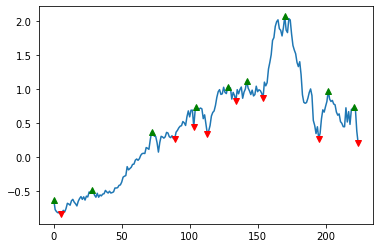

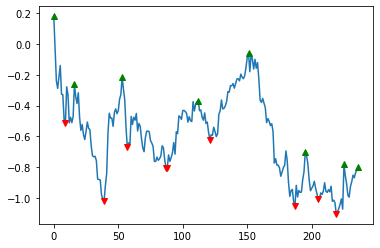

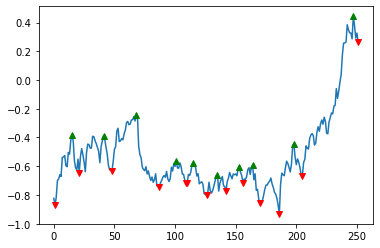

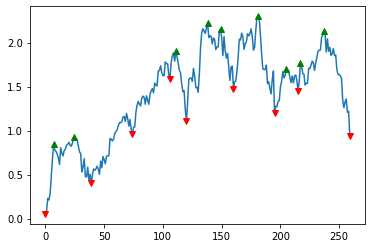

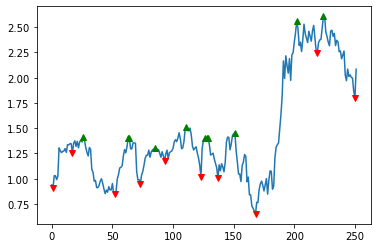

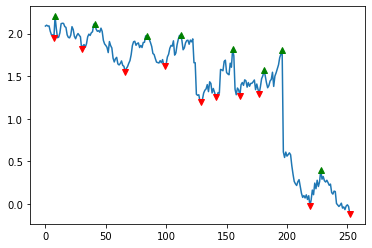

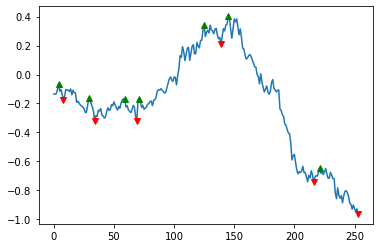

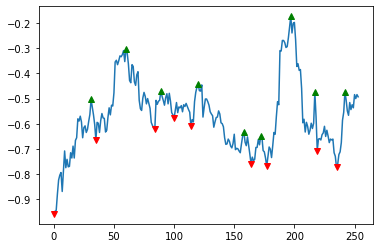

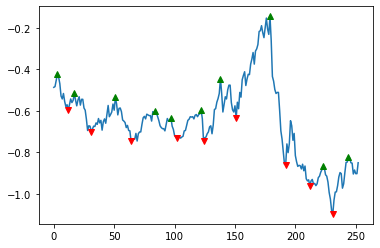

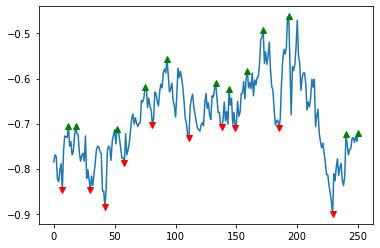

In [115]:
for key in data_lagged.keys():
    plt.plot(data_lagged[key]['Close'])
    for sell in sells[key]:
        plt.plot(sell, data_lagged[key]['Close'][sell], marker = '^', color = 'green')
    for buy in buys[key]:
        plt.plot(buy, data_lagged[key]['Close'][buy], marker = 'v', color = 'red')
    plt.show()

In [61]:
data_lagged.keys()

dict_keys([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [62]:
subset_dict_label = label(subset_dict)
subset_dict_label[2008]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use,Days Since Harvest,Labels
0,2007-10-01,-0.626041,-0.556610,-0.554022,-0.334083,0.607506,0.747199,0.077627,0.416007,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,-1.724370,0
1,2007-10-02,-0.765897,-0.608131,-0.685953,4.013997,0.517957,0.410835,1.812521,2.332146,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,-1.708974,0
2,2007-10-03,-0.795616,-0.722806,-0.730501,-0.334083,0.562732,0.218627,-0.624933,-0.722406,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,-1.693578,0
3,2007-10-04,-0.811350,-0.734440,-0.739068,-0.334083,0.920928,0.554991,-0.495891,-0.496977,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,-1.678181,0
4,2007-10-05,-0.811350,-0.774327,-0.749349,-0.334083,1.055252,1.179668,0.780187,0.765420,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,-1.662785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2008-09-23,0.713081,0.674899,0.689900,-0.207132,0.920928,1.035512,0.077627,-0.046121,0.695806,...,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097,1.662785,1
221,2008-09-24,0.732311,0.756335,0.727594,0.078508,0.786605,0.891355,0.077627,-0.271549,0.695806,...,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097,1.678181,1
222,2008-09-25,0.699095,0.699829,0.727594,-0.334083,0.831379,0.699147,-0.782651,-1.049276,0.695806,...,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097,1.693578,1
223,2008-09-29,0.382671,0.545267,0.419184,1.760612,0.428408,0.458887,0.780187,0.641435,0.695806,...,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097,1.708974,1


In [127]:
subset_dict_label[2007]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use,Days Since Harvest,Labels
0,2007-03-29,-0.449473,-0.438612,-0.386110,-0.302346,-0.153662,0.458887,-0.495891,-0.598420,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.718879,2
1,2007-03-30,-0.585832,-0.415344,-0.512901,0.364149,0.473183,0.603043,-0.782651,-0.722406,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.692435,1
2,2007-04-02,-0.708206,-0.684581,-0.643118,-0.334083,0.025437,-0.117737,-0.366850,-0.496977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.665991,1
3,2007-04-03,-0.767645,-0.732778,-0.697947,0.681527,-0.422309,-0.838518,2.357363,2.005275,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.639546,1
4,2007-04-04,-0.685480,-0.659652,-0.617417,-0.334083,-1.093928,-1.078778,1.654803,1.543148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.613102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2007-09-24,-0.592825,-0.530019,-0.536888,-0.334083,1.055252,1.275772,0.493428,0.641435,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,1.613102,1
127,2007-09-25,-0.605062,-0.563258,-0.535175,0.015033,0.607506,0.362783,-0.366850,-0.372992,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,1.639546,1
128,2007-09-26,-0.582336,-0.559934,-0.552309,-0.334083,0.338859,0.122523,-1.485211,-0.271549,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,1.665991,1
129,2007-09-27,-0.500170,-0.470189,-0.509474,-0.334083,0.786605,0.554991,-0.782651,-0.598420,0.501137,...,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951,1.692435,2


In [128]:
all_labels_dict = {}
all_data_dict = {}

for key in tqdm(subset_dict_label.keys()):
    labels_list = []
    data_list = []
    for i in range(len(subset_dict_label[key])):
        if i<22:
            data_list.append(subset_dict_label[key].iloc[i-22:i,1:23])
        labels_list.append(subset_dict_label[key]['Labels'][i])
        data_list.append(subset_dict_label[key].iloc[i-22:i,1:23])
        labels_list.append(subset_dict_label[key]['Labels'][i])
    
    all_data_dict[key] = data_list
    all_labels_dict[key] = labels_list
    

100%|██████████| 12/12 [00:01<00:00,  9.86it/s]


In [129]:
all_data_dict[2008]

[Empty DataFrame
 Columns: [Close, High, Low, PRCP, TMAX, TMIN, WSF2, WSF5, Area Planted, Area Harvested, Yield, Beginning Stocks, Production, Imports, Total Supply, Feed and Residual, FSI, Ethanol, Total Domestic, Exports, Total Use, Days Since Harvest]
 Index: []
 
 [0 rows x 22 columns],
 Empty DataFrame
 Columns: [Close, High, Low, PRCP, TMAX, TMIN, WSF2, WSF5, Area Planted, Area Harvested, Yield, Beginning Stocks, Production, Imports, Total Supply, Feed and Residual, FSI, Ethanol, Total Domestic, Exports, Total Use, Days Since Harvest]
 Index: []
 
 [0 rows x 22 columns],
 Empty DataFrame
 Columns: [Close, High, Low, PRCP, TMAX, TMIN, WSF2, WSF5, Area Planted, Area Harvested, Yield, Beginning Stocks, Production, Imports, Total Supply, Feed and Residual, FSI, Ethanol, Total Domestic, Exports, Total Use, Days Since Harvest]
 Index: []
 
 [0 rows x 22 columns],
 Empty DataFrame
 Columns: [Close, High, Low, PRCP, TMAX, TMIN, WSF2, WSF5, Area Planted, Area Harvested, Yield, Beginning S

In [122]:
del all_data_dict[2018]
del all_labels_dict[2018]
del all_data_dict[2007]
del all_labels_dict[2007]

In [220]:
subset_matrices[2008]

,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
1987,2015-04-02,-0.501919,-0.476837,-0.483773,0.776740,0.338859,0.506939,-0.080090,0.089136,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.215809,0.708457,0.720268,0.852596,-0.093054,0.646298
1988,2015-04-03,-0.501919,-3.059517,-3.076133,-0.048443,-0.332760,-0.406050,0.780187,1.092291,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.215809,0.708457,0.720268,0.852596,-0.093054,0.646298
1989,2015-04-06,-0.512408,-0.466865,-0.447792,-0.334083,0.025437,0.410835,-0.338174,-0.271549,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.215809,0.708457,0.720268,0.852596,-0.093054,0.646298
1990,2015-04-07,-0.526393,-0.485146,-0.458072,-0.175394,-0.287985,0.170575,-0.080090,-0.136292,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.215809,0.708457,0.720268,0.852596,-0.093054,0.646298
1991,2015-04-08,-0.552616,-0.500104,-0.494053,-0.207132,-0.332760,0.122523,-0.782651,-0.722406,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.215809,0.708457,0.720268,0.852596,-0.093054,0.646298
1992,2015-04-09,-0.561357,-0.533343,-0.506047,-0.016705,-0.243211,-0.261893,1.812521,1.543148,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.096429,0.708457,0.720268,0.782479,-0.093054,0.589875
1993,2015-04-10,-0.568350,-0.536667,-0.511187,-0.334083,-0.198436,-0.213841,1.239002,1.317720,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.096429,0.708457,0.720268,0.782479,-0.093054,0.589875
1994,2015-04-13,-0.613803,-0.559934,-0.538601,-0.175394,0.249310,0.218627,0.780187,0.990849,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.096429,0.708457,0.720268,0.782479,-0.093054,0.589875
1995,2015-04-14,-0.592825,-0.568244,-0.540315,-0.334083,0.383633,-0.069685,-0.782651,-0.823848,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.096429,0.708457,0.720268,0.782479,-0.093054,0.589875
1996,2015-04-15,-0.575343,-0.539991,-0.536888,-0.334083,0.428408,0.410835,0.364386,0.314564,-0.138488,...,-0.48849,0.914854,-0.349722,0.657472,0.096429,0.708457,0.720268,0.782479,-0.093054,0.589875


In [217]:
all_data_dict[2008][0]

,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,Area Planted,Area Harvested,...,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use,Days Since Harvest


In [218]:
del subset_matrices[2018]
del subset_matrices[2007]


In [219]:
file_to_write = open("data_in_matrix.pkl", "wb")
pickle.dump(subset_matrices, file_to_write)

In [193]:
#all_data_dict[2008][0]
file_to_write = open("data_in_matrix.pkl", "wb")
pickle.dump(all_data_dict, file_to_write)

In [194]:
file_to_write = open("label_for_matrix.pkl", "wb")
pickle.dump(all_labels_dict, file_to_write)

In [195]:
file_to_write = open("data_lagged.pkl", "wb")
pickle.dump(data_lagged, file_to_write)

In [196]:
file_to_write = open("labels_lagged.pkl", "wb")
pickle.dump(label_lagged, file_to_write)

In [178]:
test = labeled_dict_lagged
file_to_write = open("data_w_day.pickle", "wb")
pickle.dump(test, file_to_write)


In [ ]:
f = open("sample.pkl", "w")
pickle.dump(labeled_dict_lagged, f)

In [117]:
f = open('data.pickle', "rb")
pickle.load(f)

{2007:           Date     Close      High       Low      PRCP      TMAX      TMIN  \
 0   2007-03-29 -0.449473 -0.438612 -0.386110 -0.302346 -0.153662  0.458887   
 1   2007-03-30 -0.585832 -0.415344 -0.512901  0.364149  0.473183  0.603043   
 2   2007-04-02 -0.708206 -0.684581 -0.643118 -0.334083  0.025437 -0.117737   
 3   2007-04-03 -0.767645 -0.732778 -0.697947  0.681527 -0.422309 -0.838518   
 4   2007-04-04 -0.685480 -0.659652 -0.617417 -0.334083 -1.093928 -1.078778   
 ..         ...       ...       ...       ...       ...       ...       ...   
 126 2007-09-24 -0.592825 -0.530019 -0.536888 -0.334083  1.055252  1.275772   
 127 2007-09-25 -0.605062 -0.563258 -0.535175  0.015033  0.607506  0.362783   
 128 2007-09-26 -0.582336 -0.559934 -0.552309 -0.334083  0.338859  0.122523   
 129 2007-09-27 -0.500170 -0.470189 -0.509474 -0.334083  0.786605  0.554991   
 130 2007-09-28 -0.596321 -0.483484 -0.540315 -0.334083  0.517957  0.170575   
 
          WSF2      WSF5  Area Planted  ... 

In [33]:
for key in corn_year_dict_new.keys():
    labels = []
    sell_threshold = np.sort(corn_year_dict_new[key]['Close'])[-20]
    buy_threshold = np.sort(corn_year_dict_new[key]['Close'])[20]
    for i in range(len(corn_year_dict_new[key])):
        if corn_year_dict_new[key]['Close'][i] >= sell_threshold:
            labels.append(1)
        elif corn_year_dict_new[key]['Close'][i] <= buy_threshold:
            labels.append(-1)
        else:
            labels.append(0)

    corn_year_dict_new[key]['Labels'] = labels
        

In [34]:
corn_year_dict_new[2007]

,Open,Close,High,Low,Volume,Date,Labels
0,3.9500,3.9400,3.9425,3.9250,NaN,2007-03-29,1
1,0.0000,3.7450,3.9775,3.7400,NaN,2007-03-30,0
2,3.5600,3.5700,3.5725,3.5500,NaN,2007-04-02,0
3,3.4700,3.4850,3.5000,3.4700,NaN,2007-04-03,0
4,3.5975,3.6025,3.6100,3.5875,NaN,2007-04-04,0
...,...,...,...,...,...,...,...
123,3.7525,3.7350,3.8050,3.7050,89555.0,2007-09-24,0
124,3.7250,3.7175,3.7550,3.7075,65812.0,2007-09-25,0
125,3.7075,3.7500,3.7600,3.6825,67962.0,2007-09-26,0
126,3.7600,3.8675,3.8950,3.7450,107139.0,2007-09-27,1


In [35]:
weather['Date'] = pd.to_datetime(weather['DATE'])

In [36]:
weather_subset = weather[weather['STATION'] == 'USW00014933']

In [37]:
for key in corn_year_dict_new.keys():
    corn_year_dict_new[key] = corn_year_dict_new[key].merge(weather_subset, how = 'left', on = 'Date' )
    corn_year_dict_new[key] = corn_year_dict_new[key].merge(normalized_monthly_corn_data, how = 'left', on = 'Date')

In [38]:
list(corn_year_dict_new[2008].columns)

['Open',
 'Close',
 'High',
 'Low',
 'Volume',
 'Date',
 'Labels',
 'STATION',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'PRCP',
 'TMAX',
 'TMIN',
 'WDMV',
 'WSF2',
 'WSF5',
 'Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use',
 'Ending Stocks',
 'World BeginningStocks',
 'World Production',
 'World Imports',
 'World DomesticFeed',
 'World DomesticTotal',
 'World Exports',
 'World EndingStocks',
 'United States BeginningStocks',
 'United States Production',
 'United States Imports',
 'United States DomesticFeed',
 'United States DomesticTotal',
 'United States Exports',
 'United States EndingStocks',
 'Argentina BeginningStocks',
 'Argentina Production',
 'Argentina Imports',
 'Argentina DomesticFeed',
 'Argentina DomesticTotal',
 'Argentina Exports',
 'Argentina EndingStocks',
 'Brazil BeginningStocks',
 'Brazil Production',
 'Brazil 

In [45]:
from statsmodels.tsa.stattools import adfuller


In [46]:
test_result=adfuller(corn_year_dict_new[2008]['Close'])


In [47]:
test_result

(-1.5048946162363042,
 0.5310886676066703,
 0,
 224,
 {'1%': -3.459884913337196,
  '5%': -2.8745310704320794,
  '10%': -2.573693840082908},
 -225.26366483586656)

In [49]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(corn_year_dict_new[2008]['Close'])

ADF Test Statistic : -1.5048946162363042
p-value : 0.5310886676066703
#Lags Used : 0
Number of Observations : 224
weak evidence against null hypothesis,indicating it is non-stationary 


In [68]:
first_diff = corn_year_dict_new[2008]['Close'] - corn_year_dict_new[2008]['Close'].shift(5)
first_diff = first_diff[5:]

In [69]:
adfuller_test(first_diff)

ADF Test Statistic : -2.8530472623053944
p-value : 0.051086741470862465
#Lags Used : 15
Number of Observations : 204
weak evidence against null hypothesis,indicating it is non-stationary 


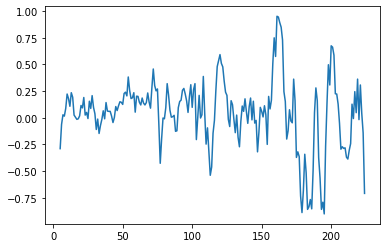

In [70]:
plt.plot(first_diff)

In [92]:
def generate_time_lags(df,col, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n, col}"] = df_n[col].shift(n)
    #df_n = df_n.iloc[n_lags:]
    return df_n

In [93]:
test_2008 = corn_year_dict_new[2008][['Labels', 'Date', 'Close', 'High', 'Low','PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5','Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']]

In [94]:
test_2008

,Labels,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,...,Beginning Stocks,Production,Imports,Total Supply,Feed and Residual,FSI,Ethanol,Total Domestic,Exports,Total Use
0,-1,2007-10-01,3.6875,3.7650,3.6800,0.00,75.0,58.0,21.0,30.0,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
1,-1,2007-10-02,3.4875,3.6875,3.4875,1.37,73.0,51.0,33.1,47.0,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
2,-1,2007-10-03,3.4450,3.5150,3.4225,0.00,74.0,47.0,16.1,19.9,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
3,-1,2007-10-04,3.4225,3.4975,3.4100,0.00,82.0,54.0,17.0,21.9,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
4,-1,2007-10-05,3.4225,3.4375,3.3950,0.00,85.0,67.0,25.9,33.1,...,-0.723040,0.118574,-0.650767,-0.127715,1.528997,-1.899161,-2.000121,-1.047591,1.094595,-0.374951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,2008-09-23,5.6025,5.6175,5.4950,0.04,82.0,64.0,21.0,25.9,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
221,0,2008-09-24,5.6300,5.7400,5.5500,0.13,79.0,61.0,21.0,23.9,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
222,0,2008-09-25,5.5825,5.6550,5.5500,0.00,80.0,57.0,15.0,17.0,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097
223,0,2008-09-29,5.1300,5.4225,5.1000,0.66,71.0,52.0,25.9,32.0,...,-0.300849,-0.086635,-0.560453,-0.181517,2.006520,-2.371407,-2.429656,-1.250932,1.556459,-0.341097


In [98]:
df_generated = test_2008
for column in list(test_2008.keys()):
    print(column)
    df_generated = generate_time_lags(df_generated, column, 20)
df_generated[]


Labels
Date
Close
High
Low
PRCP
TMAX
TMIN
WSF2
WSF5
Area Planted
Area Harvested
Yield
Beginning Stocks
Production
Imports
Total Supply
Feed and Residual
FSI
Ethanol
Total Domestic
Exports
Total Use


,Labels,Date,Close,High,Low,PRCP,TMAX,TMIN,WSF2,WSF5,...,"lag(11, 'Total Use')","lag(12, 'Total Use')","lag(13, 'Total Use')","lag(14, 'Total Use')","lag(15, 'Total Use')","lag(16, 'Total Use')","lag(17, 'Total Use')","lag(18, 'Total Use')","lag(19, 'Total Use')","lag(20, 'Total Use')"
0,-1,2007-10-01,3.6875,3.7650,3.6800,0.00,75.0,58.0,21.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,2007-10-02,3.4875,3.6875,3.4875,1.37,73.0,51.0,33.1,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,2007-10-03,3.4450,3.5150,3.4225,0.00,74.0,47.0,16.1,19.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,2007-10-04,3.4225,3.4975,3.4100,0.00,82.0,54.0,17.0,21.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,2007-10-05,3.4225,3.4375,3.3950,0.00,85.0,67.0,25.9,33.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,2008-09-23,5.6025,5.6175,5.4950,0.04,82.0,64.0,21.0,25.9,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
221,0,2008-09-24,5.6300,5.7400,5.5500,0.13,79.0,61.0,21.0,23.9,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
222,0,2008-09-25,5.5825,5.6550,5.5500,0.00,80.0,57.0,15.0,17.0,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097
223,0,2008-09-29,5.1300,5.4225,5.1000,0.66,71.0,52.0,25.9,32.0,...,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097,-0.341097


In [89]:
list(test_2008.keys())

['Labels',
 'Date',
 'Close',
 'High',
 'Low',
 'PRCP',
 'TMAX',
 'TMIN',
 'WSF2',
 'WSF5',
 'Area Planted',
 'Area Harvested',
 'Yield',
 'Beginning Stocks',
 'Production',
 'Imports',
 'Total Supply',
 'Feed and Residual',
 'FSI',
 'Ethanol',
 'Total Domestic',
 'Exports',
 'Total Use']